In [34]:
import pandas as pd 
import xgboost as xgb
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [40]:
data = pd.read_csv('stroke_data.csv')
stroke_data = data.dropna()

stroke_data

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [42]:
stroke_data['stroke'].value_counts()


stroke
1    20460
0    20447
Name: count, dtype: int64

In [41]:
stroke_data.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
stroke_model = xgb.XGBClassifier(
                                # operation='binary:logistic',
                                n_estimators=100,
                                max_depth=5,
                                learning_rate=0.1,
                                random_state=10,
                                booster='gbtree'
                            )

x = stroke_data.drop(columns=['stroke', 'smoking_status', 'work_type'])
y = stroke_data['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

stroke_model.fit(x_train, y_train)
# stroke_model.fit(x_train._get_numeric_data(), np.ravel(y_train, order='C'))

stroke_prediction = stroke_model.predict(x_test)
model_accuracy = stroke_model.score(x_test, y_test)

model_accuracy

0.9169844529187445

In [44]:
model_report = classification_report(y_test, stroke_prediction)

print(model_report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5115
           1       0.91      0.93      0.92      5112

    accuracy                           0.92     10227
   macro avg       0.92      0.92      0.92     10227
weighted avg       0.92      0.92      0.92     10227



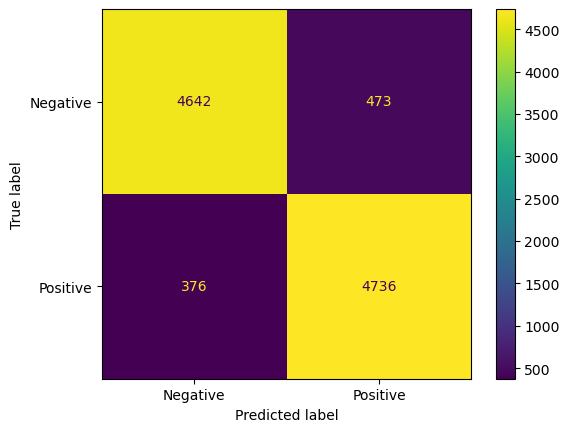

In [45]:
c_matrix = confusion_matrix(y_test, stroke_prediction)
matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=['Negative', 'Positive'])
matrix_display.plot()